<a href="https://colab.research.google.com/github/Gi0yis/Challenge-Alura-Strore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [3]:
def calcular_ingreso(tienda):
  ingreso_tienda = sum(list(tienda['Precio']))
  return ingreso_tienda

In [4]:
ingreso_tienda1 = calcular_ingreso(tienda)
ingreso_tienda2 = calcular_ingreso(tienda2)
ingreso_tienda3 = calcular_ingreso(tienda3)
ingreso_tienda4 = calcular_ingreso(tienda4)

In [5]:
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

for i in range(len(ingresos)):
  if min(ingresos) == ingresos[i]:
    print(f'Tienda {i + 1} = {ingresos[i]} --> ingreso minimo')
  else:
    print(f'Tienda {i + 1} = {ingresos[i]}')

Tienda 1 = 1150880400.0
Tienda 2 = 1116343500.0
Tienda 3 = 1098019600.0
Tienda 4 = 1038375700.0 --> ingreso minimo


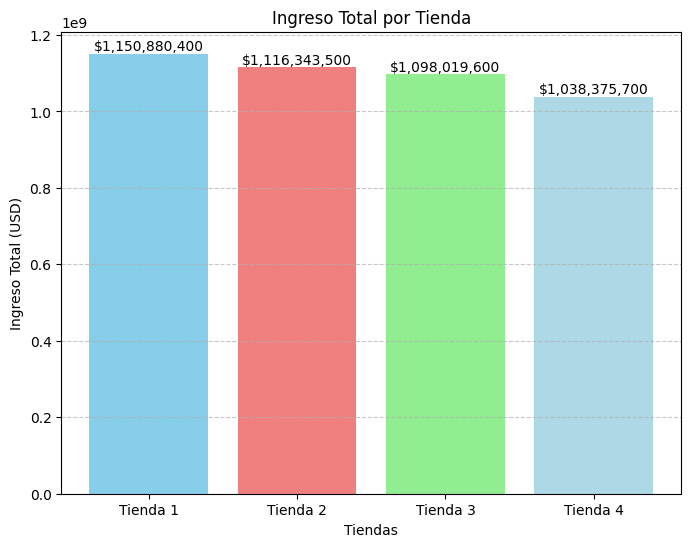

In [6]:
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 6))
plt.bar(tiendas, ingresos, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total (USD)')
plt.title('Ingreso Total por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(ingresos):
    plt.text(i, v, f"${v:,.0f}", ha='center', va='bottom')
plt.show()

# 2. Ventas por categoría

In [7]:
tienda1_dist = list(set(tienda['Categoría del Producto']))
tienda1_dist

['Deportes y diversión',
 'Juguetes',
 'Libros',
 'Artículos para el hogar',
 'Electrodomésticos',
 'Muebles',
 'Electrónicos',
 'Instrumentos musicales']

In [8]:
def ventas_categoria(tienda):

  tienda_categorias = list(set(tienda['Categoría del Producto']))
  categoria_precio = []
  for cat in tienda_categorias:
    ventas = sum(tienda['Categoría del Producto'] == cat)
    categoria_precio.append((cat, ventas))
  return categoria_precio

In [9]:
ventas_categoria_t1 = ventas_categoria(tienda)
ventas_categoria_t2 = ventas_categoria(tienda2)
ventas_categoria_t3 = ventas_categoria(tienda3)
ventas_categoria_t4 = ventas_categoria(tienda4)

In [10]:
print(ventas_categoria_t1)
print(ventas_categoria_t2)
print(ventas_categoria_t3)
print(ventas_categoria_t4)

[('Deportes y diversión', 284), ('Juguetes', 324), ('Libros', 173), ('Artículos para el hogar', 171), ('Electrodomésticos', 312), ('Muebles', 465), ('Electrónicos', 448), ('Instrumentos musicales', 182)]
[('Deportes y diversión', 275), ('Juguetes', 313), ('Libros', 197), ('Artículos para el hogar', 181), ('Electrodomésticos', 305), ('Muebles', 442), ('Electrónicos', 422), ('Instrumentos musicales', 224)]
[('Deportes y diversión', 277), ('Juguetes', 315), ('Libros', 185), ('Artículos para el hogar', 177), ('Electrodomésticos', 278), ('Muebles', 499), ('Electrónicos', 451), ('Instrumentos musicales', 177)]
[('Deportes y diversión', 277), ('Juguetes', 338), ('Libros', 187), ('Artículos para el hogar', 201), ('Electrodomésticos', 254), ('Muebles', 480), ('Electrónicos', 451), ('Instrumentos musicales', 170)]


In [11]:
def top_3_categorias(tienda):
  ventas_producto = ventas_categoria(tienda)
  ventas_producto.sort(key=lambda x: x[1], reverse=True)
  return ventas_producto[:3]

In [12]:
top_3_categorias_t1 = top_3_categorias(tienda)
top_3_categorias_t2 = top_3_categorias(tienda2)
top_3_categorias_t3 = top_3_categorias(tienda3)
top_3_categorias_t4 = top_3_categorias(tienda4)

In [13]:
print("Top 3 categorias en la tienda 1:", top_3_categorias_t1)
print("Top 3 categorias en la tienda 2:", top_3_categorias_t2)
print("Top 3 categorias en la tienda 3:", top_3_categorias_t3)
print("Top 3 categorias en la tienda 4:", top_3_categorias_t4)

Top 3 categorias en la tienda 1: [('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324)]
Top 3 categorias en la tienda 2: [('Muebles', 442), ('Electrónicos', 422), ('Juguetes', 313)]
Top 3 categorias en la tienda 3: [('Muebles', 499), ('Electrónicos', 451), ('Juguetes', 315)]
Top 3 categorias en la tienda 4: [('Muebles', 480), ('Electrónicos', 451), ('Juguetes', 338)]


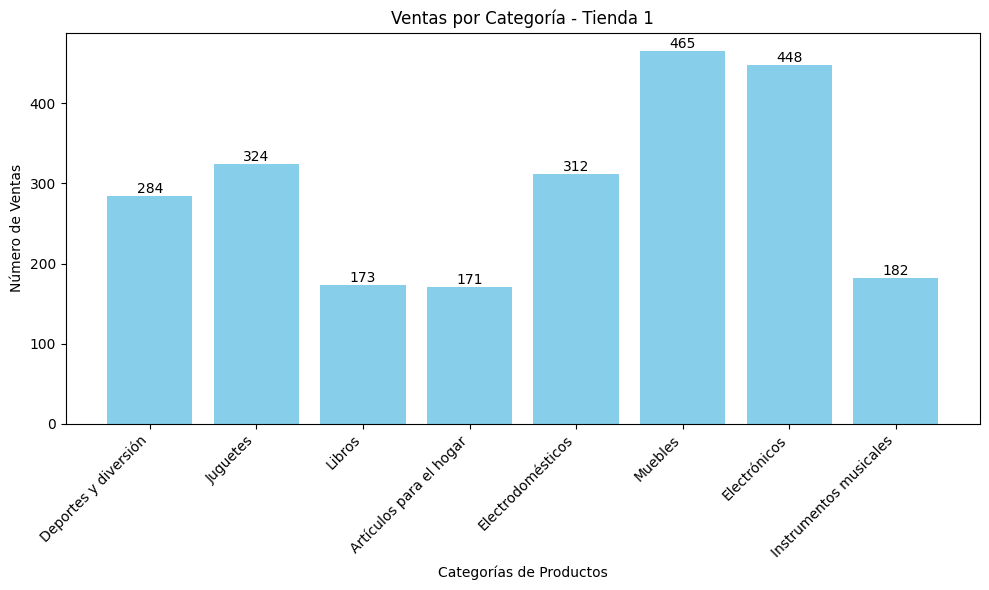

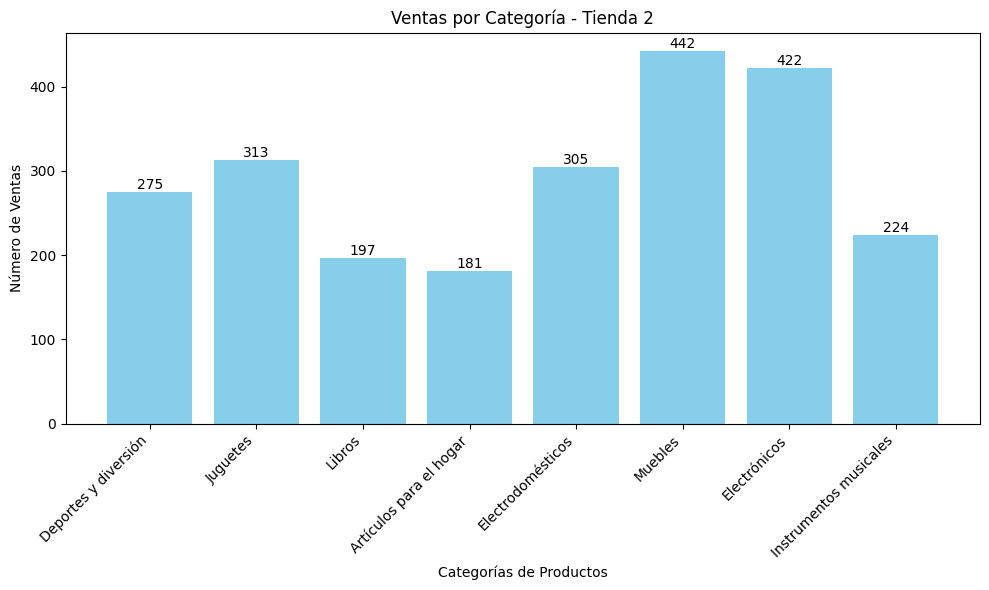

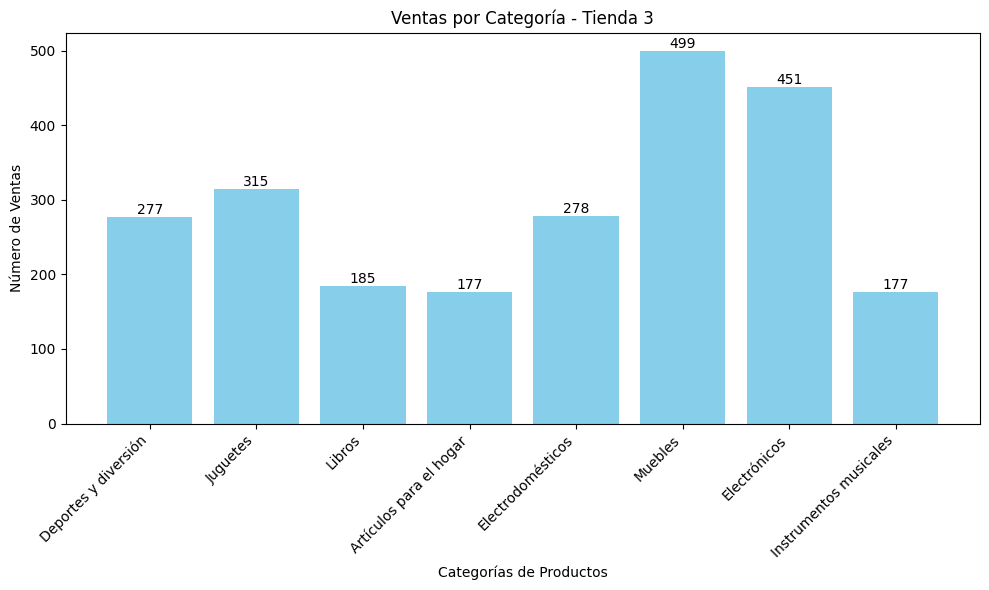

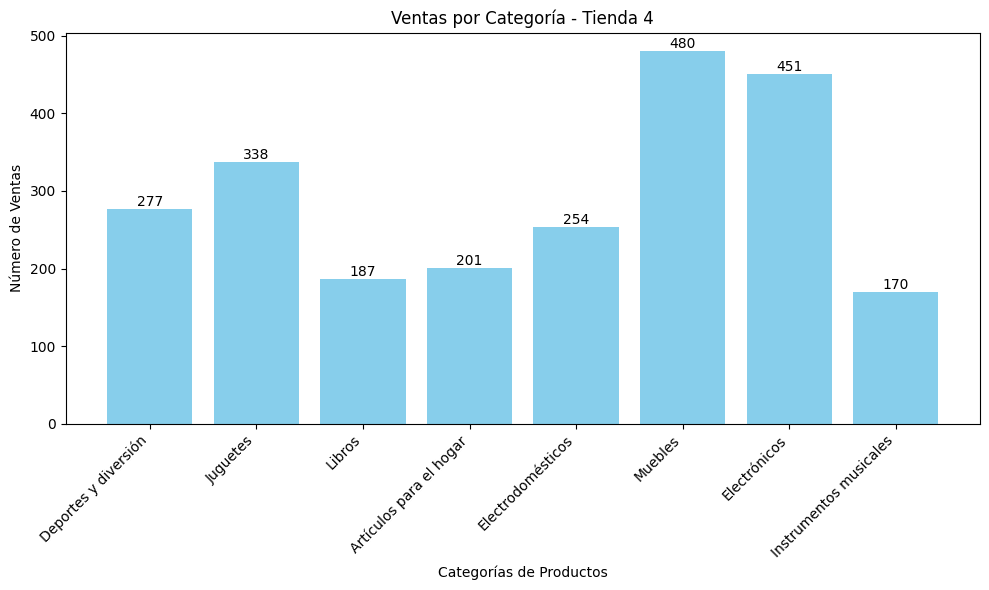

In [14]:
def plot_category_sales(category_sales_data, tienda_number):
    categorias = [data[0] for data in category_sales_data]
    ventas = [data[1] for data in category_sales_data]

    plt.figure(figsize=(10, 6))
    plt.bar(categorias, ventas, color='skyblue')
    plt.xlabel('Categorías de Productos')
    plt.ylabel('Número de Ventas')
    plt.title(f'Ventas por Categoría - Tienda {tienda_number}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    for i, v in enumerate(ventas):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

plot_category_sales(ventas_categoria_t1, 1)
plot_category_sales(ventas_categoria_t2, 2)
plot_category_sales(ventas_categoria_t3, 3)
plot_category_sales(ventas_categoria_t4, 4)

# 3. Calificación promedio de la tienda


In [15]:
def promedio_calificaciones(tienda):
  promedio_tienda = float(sum(tienda['Calificación'])) / float(len(tienda['Calificación']))
  return promedio_tienda

In [16]:
promedio_tienda1 = promedio_calificaciones(tienda)
promedio_tienda2 = promedio_calificaciones(tienda2)
promedio_tienda3 = promedio_calificaciones(tienda3)
promedio_tienda4 = promedio_calificaciones(tienda4)

In [17]:
print(f"""
Promedio tienda 1 = {promedio_tienda1}
Promedio tienda 2 = {promedio_tienda2}
Promedio tienda 3 = {promedio_tienda3}
Promedio tienda 4 = {promedio_tienda4}
""")


Promedio tienda 1 = 3.976685036032217
Promedio tienda 2 = 4.037303942348453
Promedio tienda 3 = 4.048325561678677
Promedio tienda 4 = 3.9957591178965224



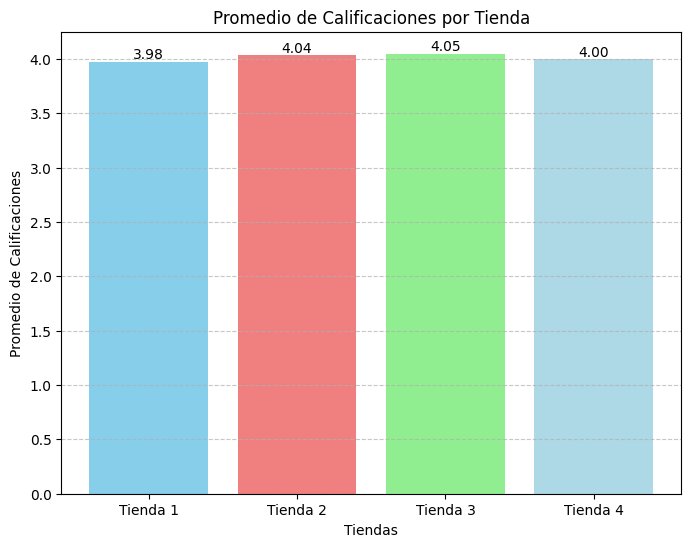

In [18]:
promedios = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 6))
plt.bar(tiendas, promedios, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Tiendas')
plt.ylabel('Promedio de Calificaciones')
plt.title('Promedio de Calificaciones por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(promedios):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# 4. Productos más y menos vendidos

In [19]:
productos = list((set(tienda['Producto'])))

In [20]:
print(max(ventas_categoria_t1))

('Muebles', 465)


In [21]:
def productos_mas_vendidos(tienda):

  productos = list(set(tienda['Producto']))
  categoria_precio = []
  for producto in productos:
    ventas = sum(tienda['Producto'] == producto)
    categoria_precio.append((producto, ventas))
  return categoria_precio

In [22]:
ventas_producto_t1 = productos_mas_vendidos(tienda)
ventas_producto_t2 = productos_mas_vendidos(tienda2)
ventas_producto_t3 = productos_mas_vendidos(tienda3)
ventas_producto_t4 = productos_mas_vendidos(tienda4)

In [23]:
print(ventas_producto_t1)
print(ventas_producto_t2)
print(ventas_producto_t3)
print(ventas_producto_t4)

[('Asistente virtual', 40), ('Batería', 53), ('Juego de mesa', 43), ('Cama king', 44), ('Silla de oficina', 46), ('Ciencia de datos con Python', 39), ('Cama box', 44), ('Dinosaurio Rex', 40), ('Modelado predictivo', 51), ('Impresora', 54), ('Mesa de centro', 44), ('Muñeca bebé', 40), ('Kit de bancas', 44), ('Bloques de construcción', 56), ('Cubo mágico 8x8', 44), ('Mochila', 39), ('Set de ollas', 43), ('Cuerda para saltar', 40), ('Guitarra acústica', 46), ('Lavadora de ropa', 47), ('Mesa de noche', 56), ('Microondas', 60), ('Celular ABXY', 33), ('Ajedrez de madera', 49), ('Estufa', 45), ('Set de vasos', 41), ('Auriculares', 50), ('Tablet ABXY', 42), ('Iniciando en programación', 41), ('Refrigerador', 54), ('Sofá reclinable', 46), ('Dashboards con Power BI', 42), ('TV LED UHD 4K', 60), ('Armario', 60), ('Secadora de ropa', 58), ('Sillón', 41), ('Lavavajillas', 48), ('Olla de presión', 35), ('Bicicleta', 54), ('Carrito de control remoto', 52), ('Smart TV', 44), ('Cubertería', 52), ('Baló

In [24]:
def top_3_productos(tienda):
  ventas_producto = productos_mas_vendidos(tienda)
  ventas_producto.sort(key=lambda x: x[1], reverse=True)
  return ventas_producto[:3]

In [25]:
top_3_t1 = top_3_productos(tienda)
top_3_t2 = top_3_productos(tienda2)
top_3_t3 = top_3_productos(tienda3)
top_3_t4 = top_3_productos(tienda4)

In [26]:
print("Top 3 productos vendidos en la tienda 1:", top_3_t1)
print("Top 3 productos vendidos en la tienda 2:", top_3_t2)
print("Top 3 productos vendidos en la tienda 3:", top_3_t3)
print("Top 3 productos vendidos en la tienda 4:", top_3_t4)

Top 3 productos vendidos en la tienda 1: [('Microondas', 60), ('TV LED UHD 4K', 60), ('Armario', 60)]
Top 3 productos vendidos en la tienda 2: [('Iniciando en programación', 65), ('Microondas', 62), ('Batería', 61)]
Top 3 productos vendidos en la tienda 3: [('Kit de bancas', 57), ('Cama king', 56), ('Mesa de comedor', 56)]
Top 3 productos vendidos en la tienda 4: [('Cama box', 62), ('Cubertería', 59), ('Cama king', 56)]


In [27]:
def top_3_productos_menos_vendidos(tienda):
  ventas_producto = productos_mas_vendidos(tienda)
  ventas_producto.sort(key=lambda x: x[1])
  return ventas_producto[:3]

In [28]:
top_3_mv_t1 = top_3_productos_menos_vendidos(tienda)
top_3_mv_t2 = top_3_productos_menos_vendidos(tienda2)
top_3_mv_t3 = top_3_productos_menos_vendidos(tienda3)
top_3_mv_t4 = top_3_productos_menos_vendidos(tienda4)

In [29]:
print("Top 3 productos menos vendidos en la tienda 1:", top_3_mv_t1)
print("Top 3 productos menos vendidos en la tienda 2:", top_3_mv_t2)
print("Top 3 productos menos vendidos en la tienda 3:", top_3_mv_t3)
print("Top 3 productos menos vendidos en la tienda 4:", top_3_mv_t4)

Top 3 productos menos vendidos en la tienda 1: [('Celular ABXY', 33), ('Auriculares con micrófono', 33), ('Olla de presión', 35)]
Top 3 productos menos vendidos en la tienda 2: [('Juego de mesa', 32), ('Impresora', 34), ('Mesa de comedor', 34)]
Top 3 productos menos vendidos en la tienda 3: [('Bloques de construcción', 35), ('Mochila', 36), ('Microondas', 36)]
Top 3 productos menos vendidos en la tienda 4: [('Guitarra eléctrica', 33), ('Armario', 34), ('Guitarra acústica', 37)]


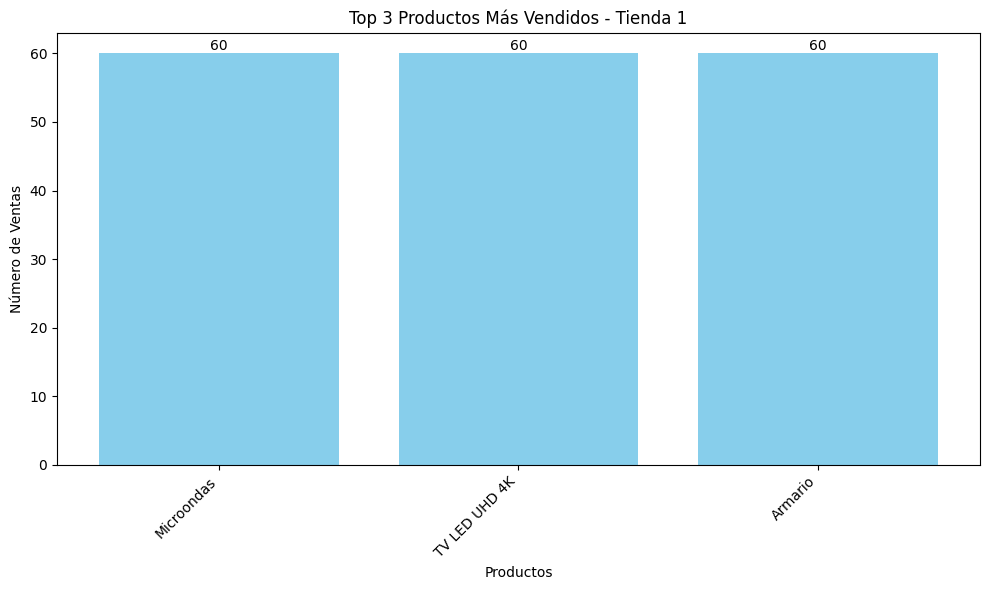

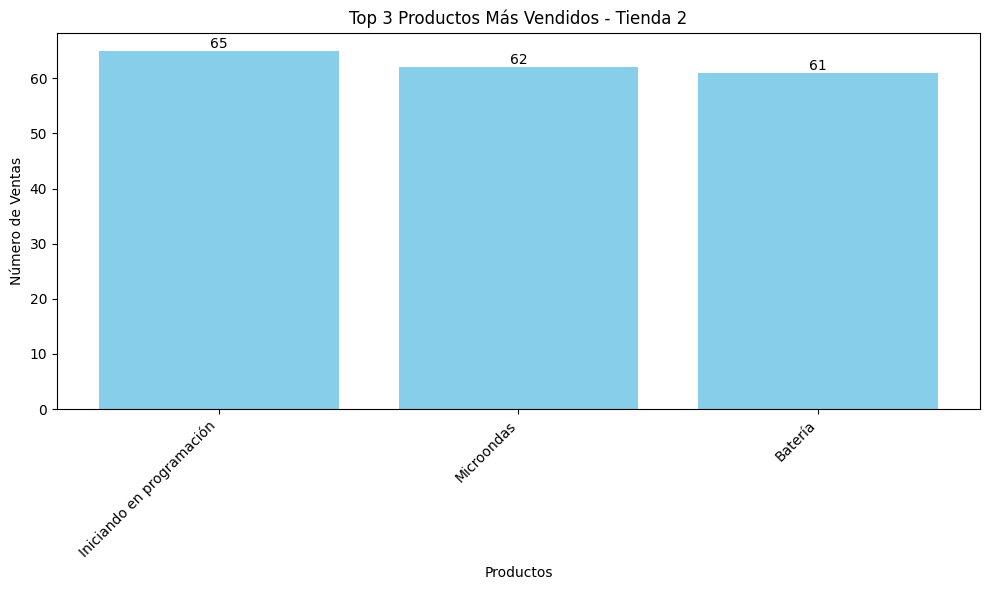

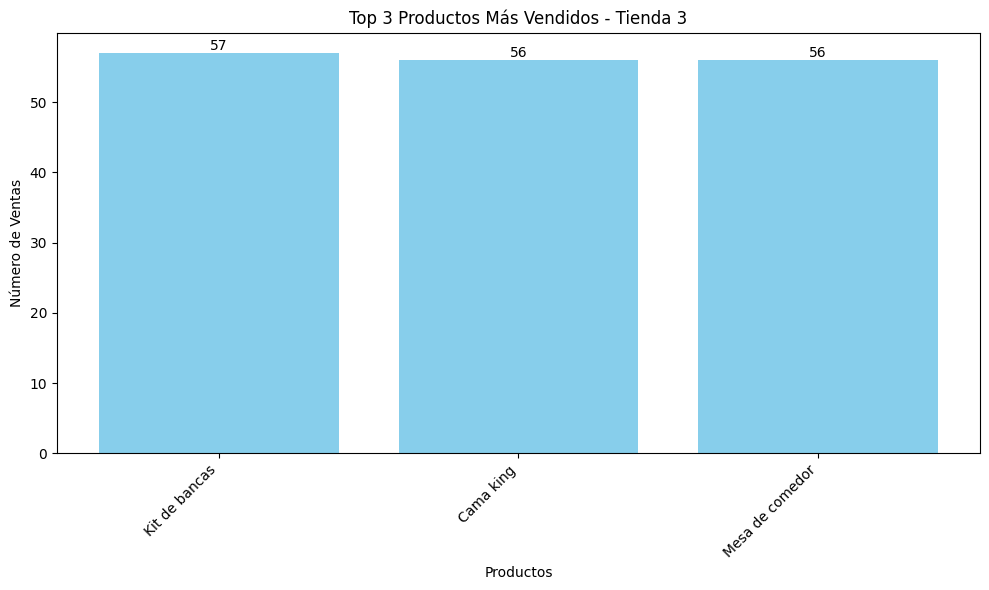

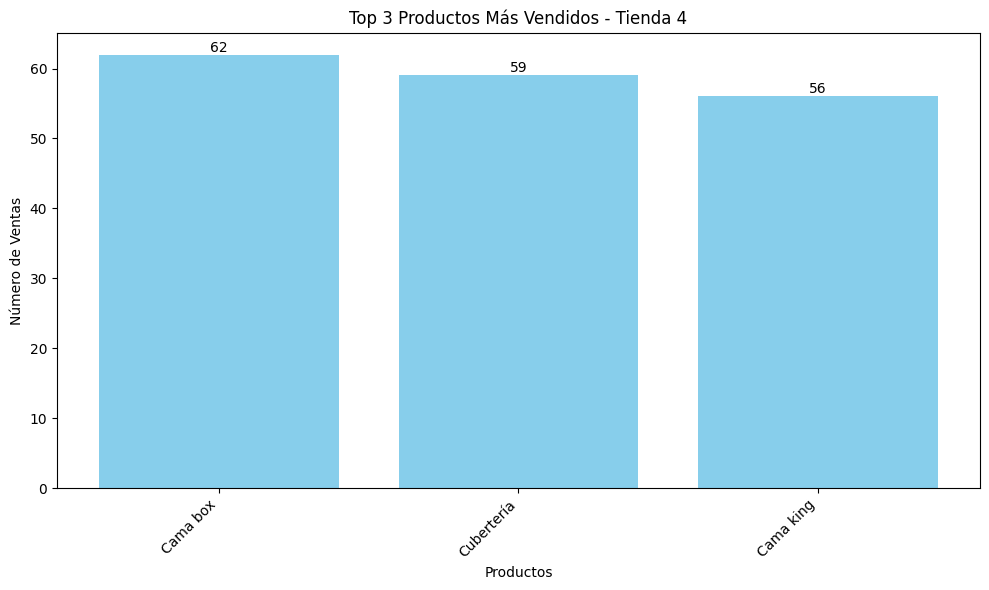

In [30]:
def plot_top_products(top_products, tienda_number):
    productos = [data[0] for data in top_products]
    ventas = [data[1] for data in top_products]

    plt.figure(figsize=(10, 6))
    plt.bar(productos, ventas, color='skyblue')
    plt.xlabel('Productos')
    plt.ylabel('Número de Ventas')
    plt.title(f'Top 3 Productos Más Vendidos - Tienda {tienda_number}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    for i, v in enumerate(ventas):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

plot_top_products(top_3_t1, 1)
plot_top_products(top_3_t2, 2)
plot_top_products(top_3_t3, 3)
plot_top_products(top_3_t4, 4)

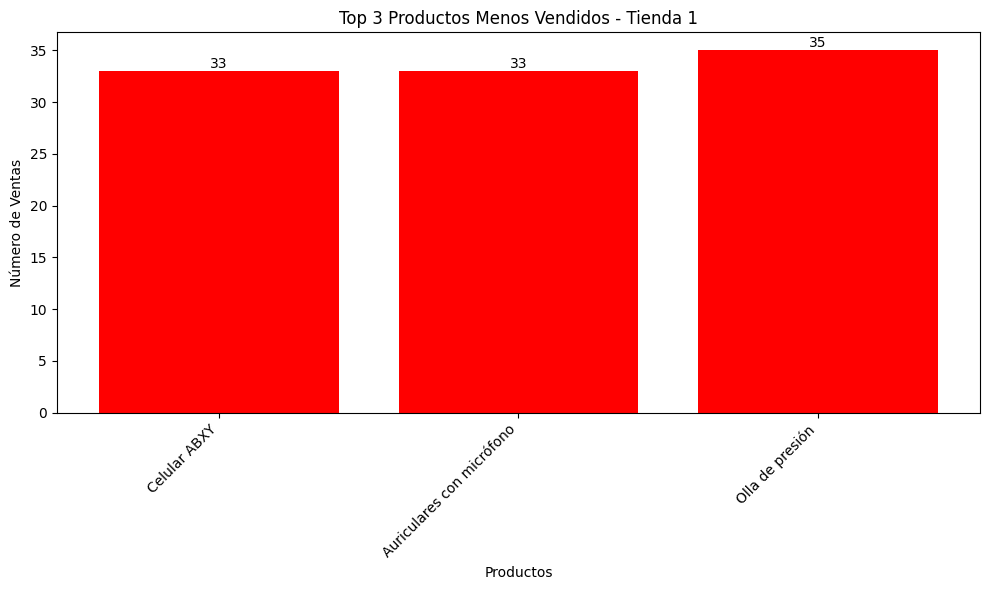

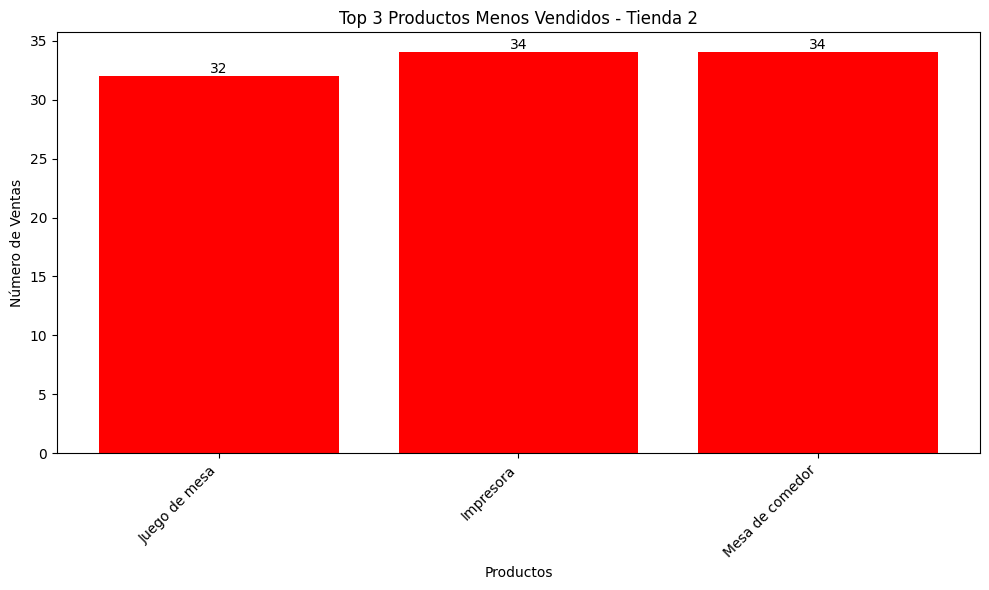

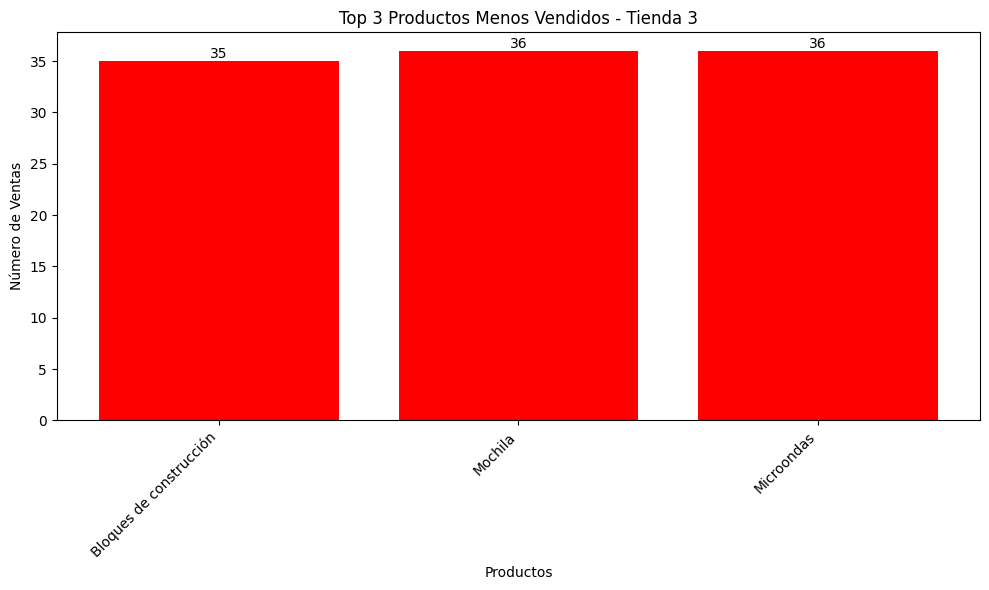

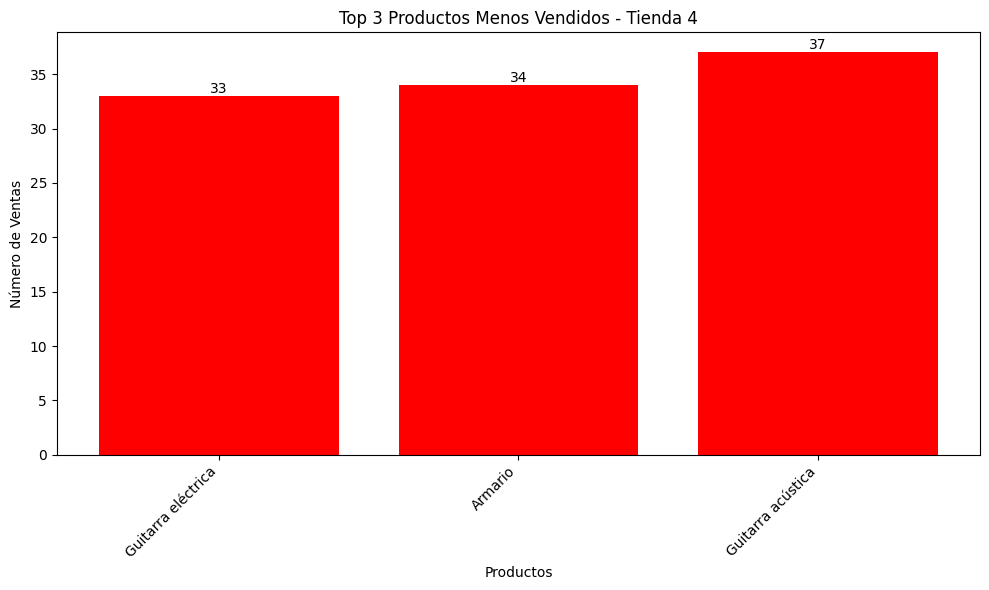

In [31]:
def plot_least_sold_products(top_products, tienda_number):
    productos = [data[0] for data in top_products]
    ventas = [data[1] for data in top_products]

    plt.figure(figsize=(10, 6))
    plt.bar(productos, ventas, color='red')
    plt.xlabel('Productos')
    plt.ylabel('Número de Ventas')
    plt.title(f'Top 3 Productos Menos Vendidos - Tienda {tienda_number}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    for i, v in enumerate(ventas):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

plot_least_sold_products(top_3_mv_t1, 1)
plot_least_sold_products(top_3_mv_t2, 2)
plot_least_sold_products(top_3_mv_t3, 3)
plot_least_sold_products(top_3_mv_t4, 4)


# 5. Envío promedio por tienda

In [32]:
def promedio_envio(tienda):
  costo_envios = list(tienda['Costo de envío'])
  promedio_envios = float(sum(costo_envios) / len(costo_envios))
  return promedio_envios

In [33]:
promedio_t1 = promedio_envio(tienda)
promedio_t2 = promedio_envio(tienda2)
promedio_t3 = promedio_envio(tienda3)
promedio_t4 = promedio_envio(tienda4)

In [34]:
print("Promedio tienda 1:", promedio_t1)
print("Promedio tienda 2:", promedio_t2)
print("Promedio tienda 3:", promedio_t3)
print("Promedio tienda 4:", promedio_t4)

Promedio tienda 1: 26018.60958033065
Promedio tienda 2: 25216.235693090293
Promedio tienda 3: 24805.680373039424
Promedio tienda 4: 23459.457167090754


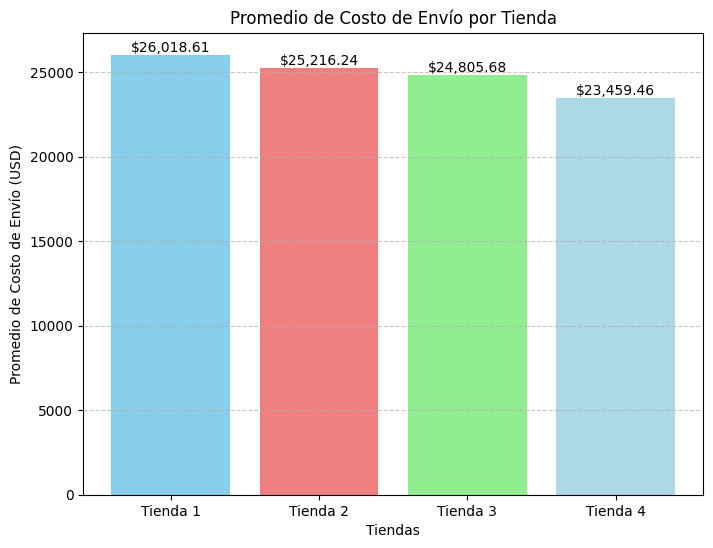

In [35]:
promedios = [promedio_t1, promedio_t2, promedio_t3, promedio_t4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plt.figure(figsize=(8, 6))
plt.bar(tiendas, promedios, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Tiendas')
plt.ylabel('Promedio de Costo de Envío (USD)')
plt.title('Promedio de Costo de Envío por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(promedios):
    plt.text(i, v + 0.1, f"${v:,.2f}", ha='center', va='bottom')
plt.show()

# Informe

Recomendaría vender la Tienda 4, ya que es la que menos ingresos genera (USD 1 038 375 700; ver gráfico de ingreso total por tienda). Además, ocupa el tercer puesto en volumen de unidades vendidas por debajo de la 1 y la 2, aunque ligeramente por encima de la 3 «ver gráfico de ventas por categoría». Su valoración promedio de clientes (3,996/5) es aceptable, pero no se traduce en facturación, a diferencia de la Tienda 3, que tiene la mejor calificación (4,048/5; ver gráfico de valoración promedio por tienda).  

Al observar los artículos más vendidos, dominan los muebles (480 uds) y los electrónicos (451 uds, por encima del promedio de las cuatro tiendas), pero al no contar con un «producto estrella» se dificulta invertir de forma focalizada «ver gráficos de artículos más y menos vendidos». En cuanto al coste de envío, la Tienda 4 es la más económica (USD 23 459,46), frente a Tienda 1 (USD 26 018,61), Tienda 2 (USD 25 216,24) y Tienda 3 (USD 24 805,68) «ver gráfico de costes de envío por tienda», pero su bajo rendimiento global no compensa esta ventaja.  

En mi opinión, conviene explotar las Tiendas 1, 2 y 3, que generan mayores ingresos y mejores indicadores, y redirigir los recursos liberados de la venta de la Tienda 4 para mejorar sus servicios y maximizar aún más su rentabilidad.  
  
